Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb

Loading Data

In [2]:
train=pd.read_csv('./sign_mnist_train.csv')
train.head(6)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255


In [3]:
print("Train shape: ", train.shape)

Train shape:  (27455, 785)


In [4]:
labels = np.array(train['label'].values)
print(labels)
unique_labels = np.unique(labels)
print(unique_labels)

[ 3  6  2 ... 18 17 23]
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


Missing J and Z

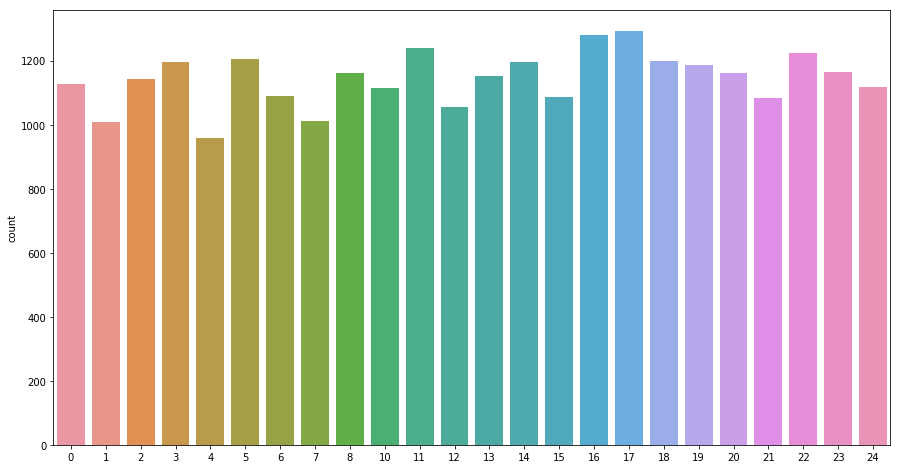

In [5]:
plt.figure(figsize = (15,8))
sb.countplot(x =labels)

Removing label column, .drop(label,axis(0 for index, 1 for columns), inplace = True to modify current obj no ret)

In [6]:
train.drop('label',axis=1,inplace=True)
train.head(6)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179
5,161,168,172,173,178,184,189,193,196,202,...,76,74,68,62,53,55,48,238,255,255


[[107 118 127 ... 204 203 202]
 [155 157 156 ... 103 135 149]
 [187 188 188 ... 195 194 195]
 ...
 [174 174 174 ... 202 200 200]
 [177 181 184 ...  64  87  93]
 [179 180 180 ... 205 209 215]]
[[107 118 127 ... 204 203 202]
 [155 157 156 ... 103 135 149]
 [187 188 188 ... 195 194 195]
 ...
 [174 174 174 ... 202 200 200]
 [177 181 184 ...  64  87  93]
 [179 180 180 ... 205 209 215]]
Number of pictures: 27455


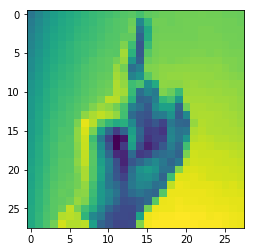

In [7]:
images = train.values
print(images)
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])
print(images)
print("Number of pictures: %d" %(images.shape[0]))
plt.imshow(images[0].reshape(28,28))

Labels will be 1 for the selected class, 0 for all others

In [8]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
print("Before transformation")
print(labels)
labels = label_binrizer.fit_transform(labels)
print("After transformation")
print(labels)


Before transformation
[ 3  6  2 ... 18 17 23]
After transformation
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


Splitting the data set into test and train
train_test_split(inputArr, outputArr, test_size = 0.3, random_state)
random_state = Used for fixed randomized outputs

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[130  80 141 ...  15   0 142]
 [ 86  87  58 ... 176 178 179]
 [204 207 209 ... 226 220 220]
 ...
 [ 32  37  42 ... 200 202 201]
 [ 47  59  64 ... 111  98  80]
 [170 170 170 ...  43  29  24]]
[[178 181 181 ... 246 244 243]
 [ 32  49  75 ...  94  92  92]
 [187 188 188 ... 147 133 154]
 ...
 [177 179 180 ... 198 196 195]
 [158 163 168 ... 239 239 238]
 [ 98 101 107 ... 135 223 215]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Using Keras to make NN

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import tensorflow as tf

Using TensorFlow backend.


Parameters

In [12]:
batch_size = 128
num_classes = 24
epochs = 20


Normalizing the data, rgb max value = 255

In [13]:
x_train = x_train / 255
x_test = x_test / 255

In [32]:
print(x_train.shape)
print(x_test.shape)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)
print(x_test.shape)

(19218, 28, 28, 1)
(8237, 28, 28, 1)
(19218, 28, 28, 1)
(8237, 28, 28, 1)


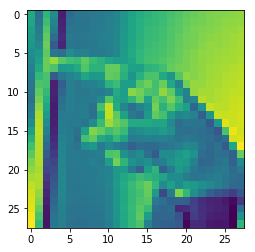

In [15]:
plt.imshow(x_train[0].reshape(28,28))

Making CNN Model

In [16]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

In [17]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Train on 19218 samples, validate on 8237 samples
Epoch 1/20
19218/19218 [==============================] - 4s 203us/step - loss: 2.5543 - acc: 0.2204 - val_loss: 1.5026 - val_acc: 0.5326
Epoch 2/20
19218/19218 [==============================] - 1s 69us/step - loss: 1.1951 - acc: 0.5963 - val_loss: 0.7977 - val_acc: 0.7607
Epoch 3/20
19218/19218 [==============================] - 1s 69us/step - loss: 0.7518 - acc: 0.7409 - val_loss: 0.4900 - val_acc: 0.8450
Epoch 4/20
19218/19218 [==============================] - 1s 69us/step - loss: 0.5120 - acc: 0.8272 - val_loss: 0.3180 - val_acc: 0.8992
Epoch 5/20
19218/19218 [==============================] - 1s 69us/step - loss: 0.3651 - acc: 0.8785 - val_loss: 0.2154 - val_acc: 0.9380
Epoch 6/20
19218/19218 [==============================] - 1s 68us/step - loss: 0.2711 - acc: 0.9108 - val_loss: 0.1628 - val_acc: 0.9517
Epoch 7/20
19218/19218 [==============================] - 1s 69us/step - loss: 0.1936 - acc: 0.9389 - val_loss: 0.1062 - val_acc

Results of training

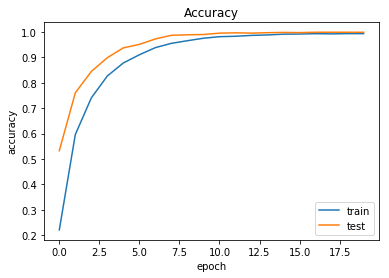

In [19]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

Testing

In [27]:
test=pd.read_csv('./sign_mnist_train.csv')
test_labels = test['label'].values
print(test_labels)
test.drop('label', axis = 1, inplace = True)

[ 3  6  2 ... 18 17 23]


In [28]:
test_images = test.values
print(test_images)
#test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
#test_images = np.array([i.flatten() for i in test_images])

[[107 118 127 ... 204 203 202]
 [155 157 156 ... 103 135 149]
 [187 188 188 ... 195 194 195]
 ...
 [174 174 174 ... 202 200 200]
 [177 181 184 ...  64  87  93]
 [179 180 180 ... 205 209 215]]


In [29]:
test_labels = label_binrizer.fit_transform(test_labels)
print(test_labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [31]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
print(test_images.shape)

(27455, 28, 28, 1)


In [35]:
y_pred = model.predict(test_images)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(test_labels, y_pred.round())

0.9935530868694227